In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm,binom,geom
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('walmart_data.txt') #Load dataset

In [218]:
df.shape

(550068, 10)

In [4]:
df.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200


In [206]:
df.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [11]:
df.info()# no null, total - 550068 records

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [14]:
df.drop('User_ID',axis=1).describe()

,Occupation,Marital_Status,Product_Category,Purchase
count,550068.000000,550068.000000,550068.000000,550068.000000
mean,8.076707,0.409653,5.404270,9263.968713
std,6.522660,0.491770,3.936211,5023.065394
min,0.000000,0.000000,1.000000,12.000000
25%,2.000000,0.000000,1.000000,5823.000000
50%,7.000000,0.000000,5.000000,8047.000000
75%,14.000000,1.000000,8.000000,12054.000000
max,20.000000,1.000000,20.000000,23961.000000


In [10]:
df.isnull().sum()#No missing or null values

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [15]:
df.Occupation.unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [38]:
df.Gender.unique() # Two categories - Male and Female

array(['F', 'M'], dtype=object)

In [16]:
df.Marital_Status.unique() #Two categories -  Single and Partnered

array([0, 1], dtype=int64)

In [17]:
df.Product_Category.unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

In [18]:
df.Purchase.unique()

array([ 8370, 15200,  1422, ...,   135,   123,   613], dtype=int64)

In [55]:
df.City_Category.unique()                     

array(['A', 'C', 'B'], dtype=object)

In [22]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

All purchase amount higher than 21400 are outliers

Upper Whisker-  21400.5 
Lower Whisker-  -3523.5
Min Purchase - 12 
Max Purchase - 23961 
Mean Purchase - 9263.968712959126 
Median Purchase - 8047.0


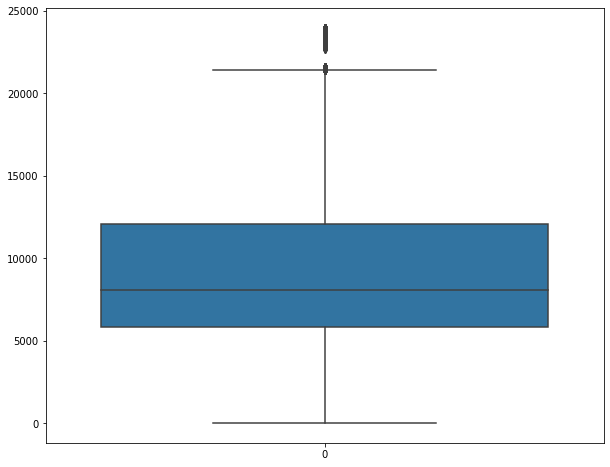

In [37]:
#Purchase amount outlier detection
plt.figure(figsize=(10,8))
#Lets get statistics of Purchase amount to find outliers
Q1=np.percentile(df.Purchase,25)
Q3=np.percentile(df.Purchase,75)
IQR=Q3-Q1
Upper_Whisker=Q3+1.5*IQR
Lower_Whisker=Q1-1.5*IQR
print("Upper Whisker- ",Upper_Whisker,"\nLower Whisker- ",Lower_Whisker)
print('Min Purchase -',df.Purchase.min(),'\nMax Purchase -',df.Purchase.max(),'\nMean Purchase -',df.Purchase.mean(),'\nMedian Purchase -',df.Purchase.median())
sns.boxplot(df.Purchase)
plt.show()

There are total 2677 outlier records

In [31]:
df[df['Purchase']>21400].count()

User_ID                       2677
Product_ID                    2677
Gender                        2677
Age                           2677
Occupation                    2677
City_Category                 2677
Stay_In_Current_City_Years    2677
Marital_Status                2677
Product_Category              2677
Purchase                      2677
dtype: int64

In [41]:
print('Average Purchase of Female customers:',round(df[df['Gender']=='F'].mean()['Purchase'],3))

Average Purchase of Female customers: 8734.566


In [42]:
print('Average Purchase of Male customers:',round(df[df['Gender']=='M'].mean()['Purchase'],3))

Average Purchase of Male customers: 9437.526


In [48]:
#Total Female customers
df[df['Gender']=='F'].count()['User_ID']

135809

In [49]:
#Total Male customers
df[df['Gender']=='M'].count()['User_ID']

414259

In [221]:
#Total unique products
df.Product_ID.nunique()                    

3631

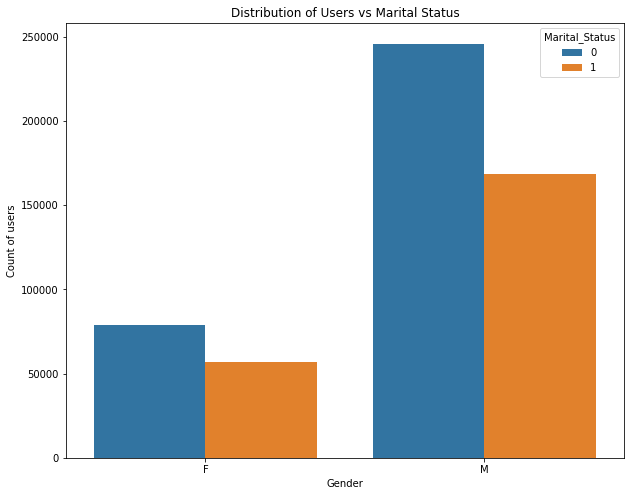

In [222]:
# Plot distribution of number of users Vs Marital status
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='Gender',hue='Marital_Status')
plt.xlabel("Gender")
plt.ylabel("Count of users")
plt.title("Distribution of Users vs Marital Status")
plt.show()

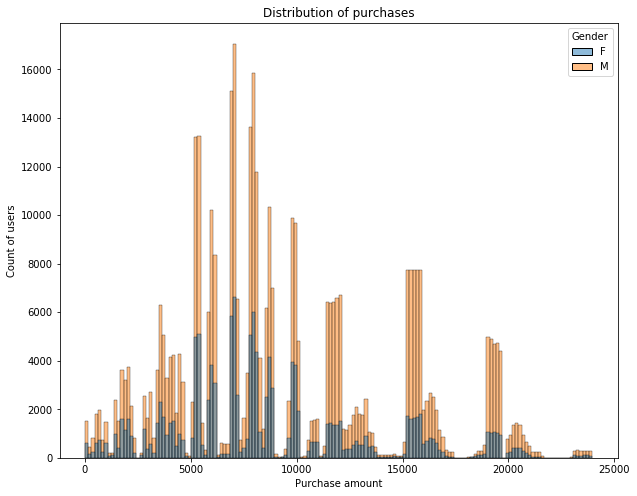

In [223]:
#Plot the purchase amount orders vs count of users
plt.figure(figsize=(10,8))
sns.histplot(data=df,x='Purchase',hue='Gender')
plt.xlabel("Purchase amount")
plt.ylabel("Count of users")
plt.title("Distribution of purchases")
plt.show()

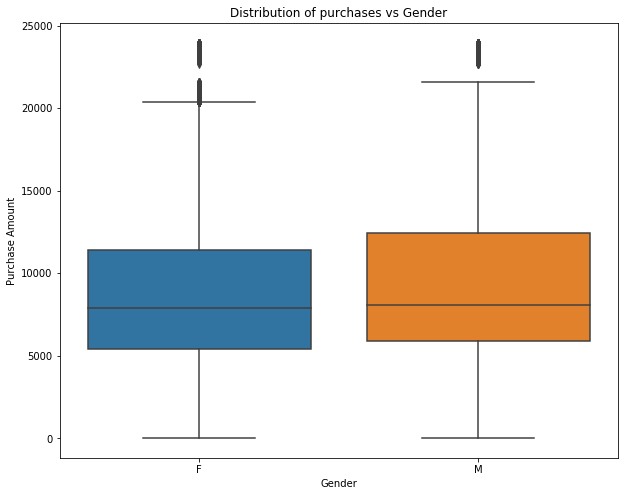

In [224]:
#Box plot to find outliers in purchase amount Vs Gender
plt.figure(figsize=(10,8))
sns.boxplot(data=df,x='Gender',y='Purchase')
plt.xlabel("Gender")
plt.ylabel("Purchase Amount")
plt.title("Distribution of purchases vs Gender")
plt.show()

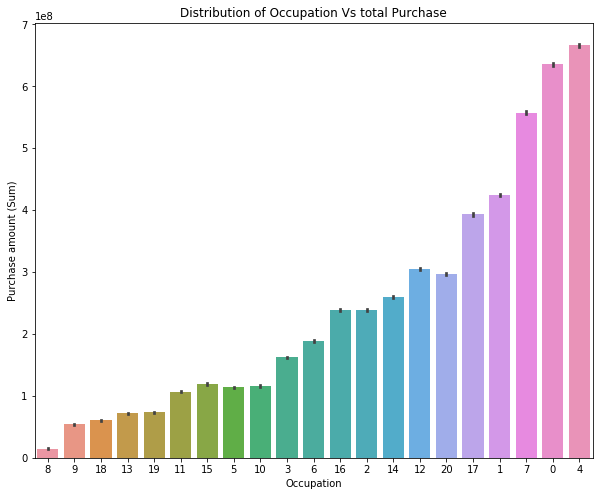

In [226]:
#Distribution of Occupation Vs total Purchase amount
plt.figure(figsize=(10,8))
sns.barplot(x='Occupation',y='Purchase' ,data=df , estimator=np.sum,order=df['Occupation'].value_counts().sort_values(ascending=True).index)
plt.xlabel("Occupation")
plt.ylabel("Purchase amount (Sum)")
plt.title("Distribution of Occupation Vs total Purchase")
plt.show()

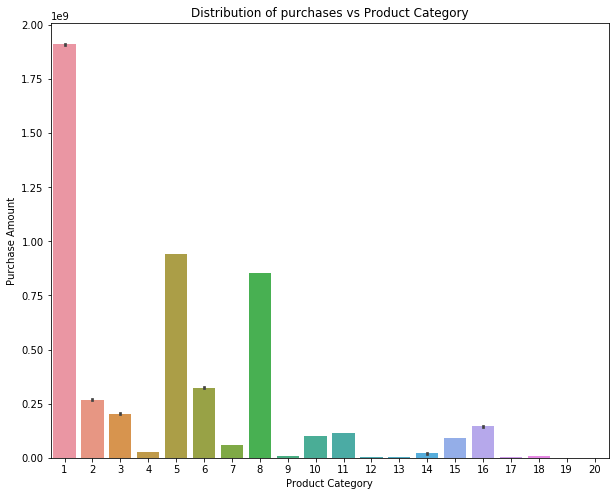

In [227]:
#Distribution of purchases vs Product Category
plt.figure(figsize=(10,8))
sns.barplot(data=df,x='Product_Category',y='Purchase',estimator=np.sum)
plt.xlabel("Product Category")
plt.ylabel("Purchase Amount")
plt.title("Distribution of purchases vs Product Category")
plt.show()

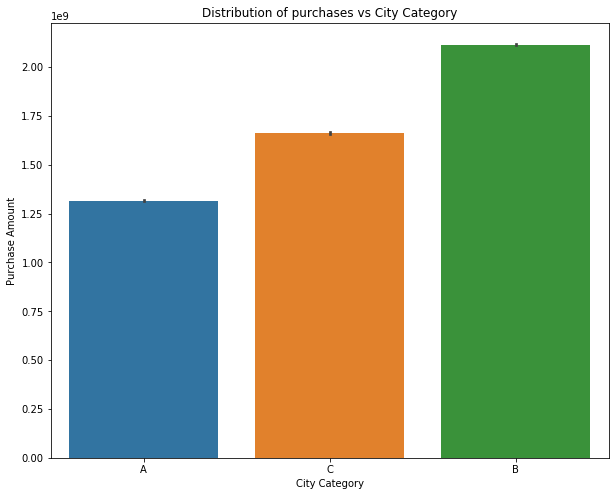

In [228]:
#Distribution of purchases vs City Category
plt.figure(figsize=(10,8))
sns.barplot(data=df,x='City_Category',y='Purchase',estimator=np.sum)
plt.xlabel("City Category")
plt.ylabel("Purchase Amount")
plt.title("Distribution of purchases vs City Category")
plt.show()

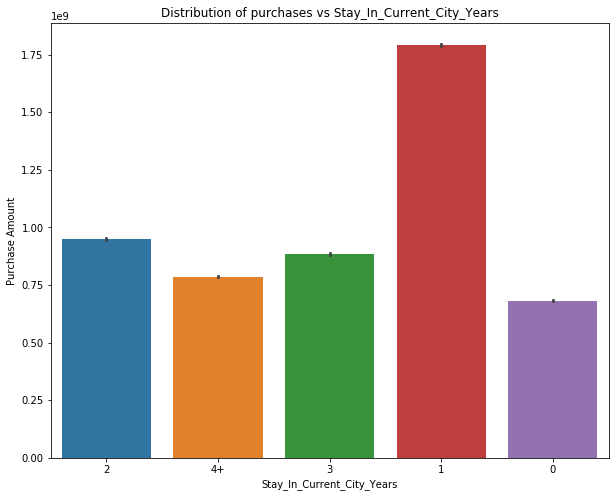

In [229]:
#Distribution of purchases vs Stay_In_Current_City_Years
plt.figure(figsize=(10,8))
sns.barplot(data=df,x='Stay_In_Current_City_Years',y='Purchase',estimator=np.sum)
plt.xlabel("Stay_In_Current_City_Years")
plt.ylabel("Purchase Amount")
plt.title("Distribution of purchases vs Stay_In_Current_City_Years")
plt.show()

<Figure size 720x576 with 0 Axes>

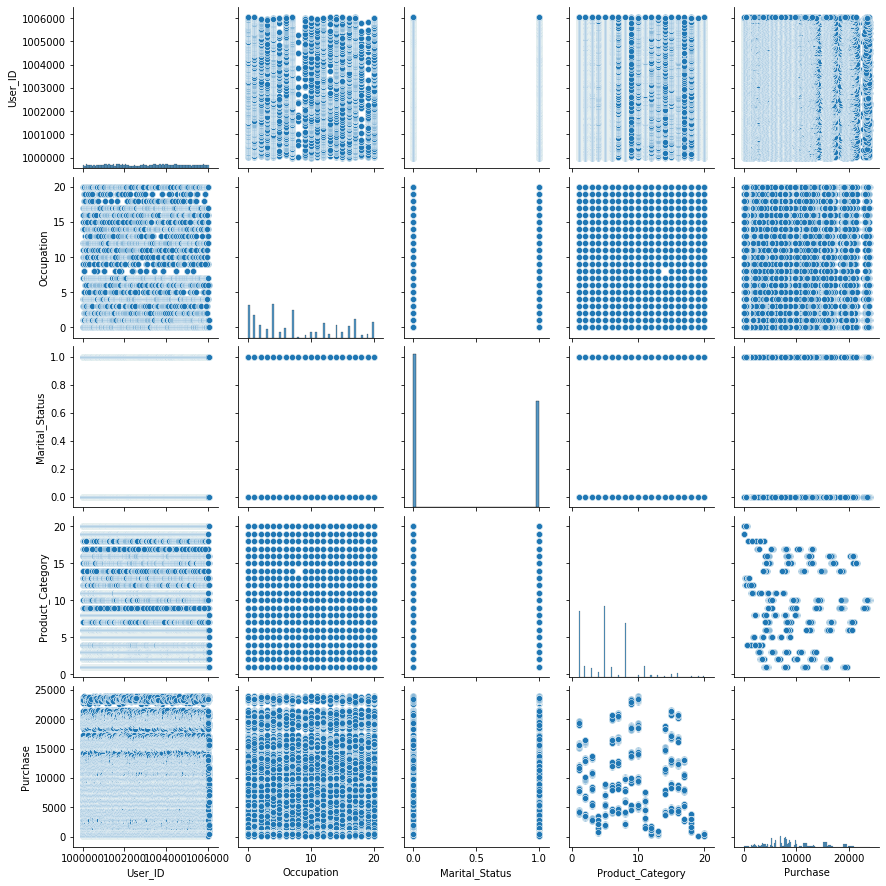

In [237]:
#Distribution of purchases vs Stay_In_Current_City_Years
plt.figure(figsize=(10,8))
sns.pairplot(df)
plt.show()

In [79]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [230]:
df.shape #shape of dataset

(550068, 10)

In [99]:
#Total unique user Id's
df.User_ID.nunique()

5891

In [98]:
#Total Female users
df[df['Gender']=='F']['User_ID'].nunique()

1666

In [97]:
#Total Male users
df[df['Gender']=='M']['User_ID'].nunique()

4225

In [100]:
#Average purchase of Female users
df[df['Gender']=='F']['Purchase'].mean()

8734.565765155476

In [101]:
#Average purchase of Male users
df[df['Gender']=='M']['Purchase'].mean()

9437.526040472265

In [127]:
df_females=df[df['Gender']=='F']
df_males=df[df['Gender']=='M']

In [102]:
#Statistics of Female sample
df[df['Gender']=='F'].describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,1.358090e+05,135809.000000,135809.000000,135809.000000,135809.000000
mean,1.003130e+06,6.740540,0.419619,5.717714,8734.565765
std,1.786631e+03,6.239639,0.493498,3.696752,4767.233289
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001569e+06,1.000000,0.000000,3.000000,5433.000000
50%,1.003159e+06,4.000000,0.000000,5.000000,7914.000000
75%,1.004765e+06,11.000000,1.000000,8.000000,11400.000000
max,1.006039e+06,20.000000,1.000000,20.000000,23959.000000


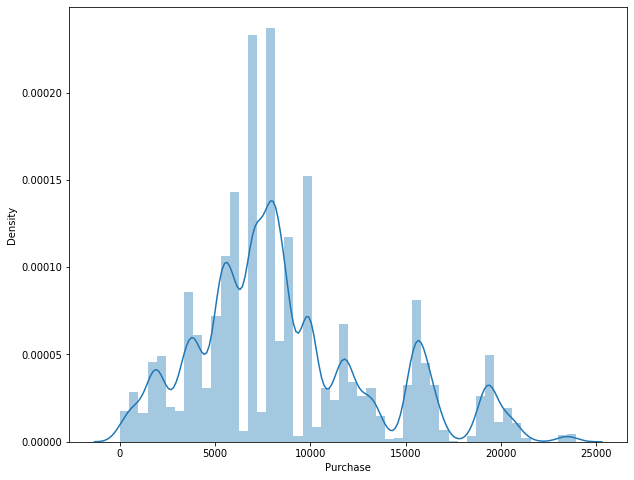

In [231]:
#Sample distribution of purchase amount for female customers
plt.figure(figsize=(10,8))
sns.distplot(df[df['Gender']=='F']['Purchase'])
plt.show()

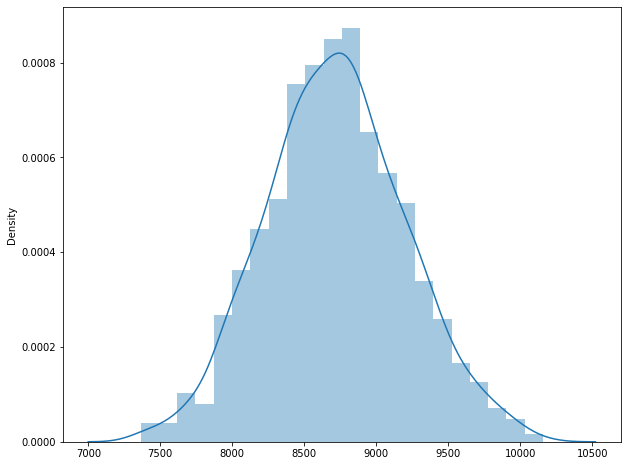

In [232]:
#Sample Mean of 100 sample size taken for 1000 times for Female customers
sample_mean_100= [np.mean(df[df['Gender']=='F']['Purchase'].sample(100)) for i in range(1000)]
plt.figure(figsize=(10,8))
sns.distplot(sample_mean_100)
plt.show()

In [155]:
#Sample mean of 100 samples taken for 1000 times
np.mean(sample_mean_100)

8697.15027

In [115]:
#Statistics of Male sample
df[df['Gender']=='M'].describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,4.142590e+05,414259.00000,414259.000000,414259.000000,414259.00000
mean,1.002996e+06,8.51475,0.406386,5.301512,9437.52604
std,1.706494e+03,6.55379,0.491159,4.006275,5092.18621
min,1.000002e+06,0.00000,0.000000,1.000000,12.00000
25%,1.001505e+06,3.00000,0.000000,1.000000,5863.00000
50%,1.003041e+06,7.00000,0.000000,5.000000,8098.00000
75%,1.004411e+06,15.00000,1.000000,8.000000,12454.00000
max,1.006040e+06,20.00000,1.000000,20.000000,23961.00000


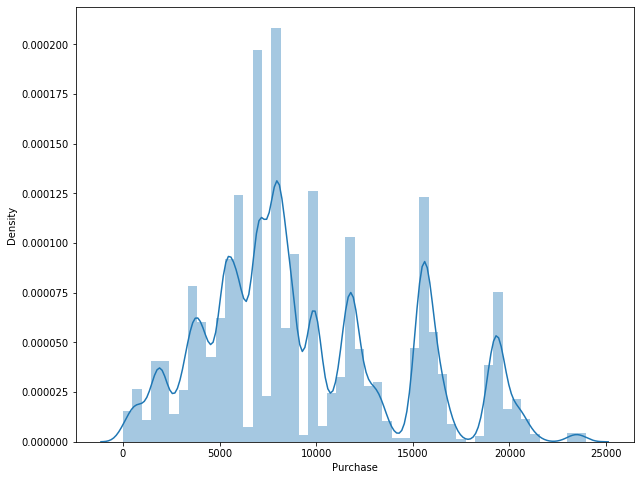

In [233]:
#Sample distribution of purchase amount for male customers
plt.figure(figsize=(10,8))
sns.distplot(df[df['Gender']=='M']['Purchase'])
plt.show()

__Business Insights -__  
__Average males purchase amount for given sample is greater than Average females purchase amount__  
1. Males purchases sample size(441259) as average - 9437.52 Vs Females purchases sample size(135809) as average - 8734.56  
2. 1M Bootstrapped samples of Male purchase amount - 9437.24 Vs 1M Bootstrapped samples of Female purchase amount - 8734.9 

__Average purchases of male customers is approx. 703$ more than female customers__

In [143]:
#1000 random samples of females purchases taken for 10000 times
bootstrapped_means_females=[]
n=1000
for reps in range(1000000):
    bootstrapped_samples_females = np.random.choice(df_females['Purchase'], size=n)
    bootstrapped_mean = np.mean(bootstrapped_samples_females)
    bootstrapped_means_females.append(bootstrapped_mean)


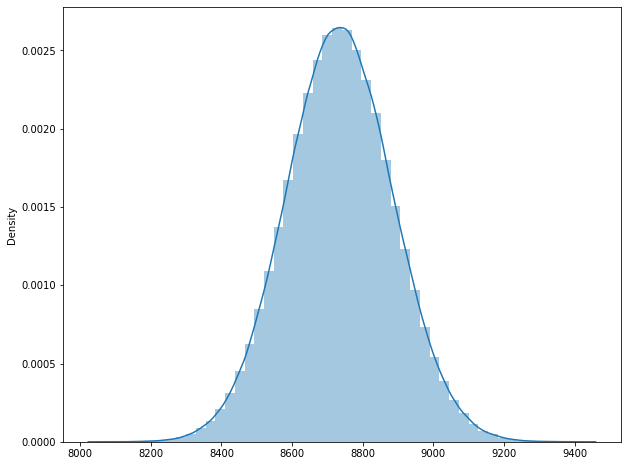

In [144]:
plt.figure(figsize=(10,8))
sns.distplot(bootstrapped_means_females)
plt.show()

In [149]:
print('Mean of bootstrpped samples of size - 1000 females purchases over 1000000 times is:',np.mean(bootstrapped_means_females))
print('Mean of given sample of size - 135809 is :',np.mean(df_females['Purchase']))

Mean of bootstrpped samples of size - 1000 females purchases over 1000000 times is: 8734.912471070997
Mean of given sample of size - 135809 is : 8734.565765155476


In [147]:
len(bootstrapped_means_females)

1000000

In [150]:
#1000 random samples of males purchases taken for 10000 times
bootstrapped_means_males=[]
n=1000
for reps in range(1000000):
    bootstrapped_samples_males = np.random.choice(df_males['Purchase'], size=n)
    bootstrapped_mean = np.mean(bootstrapped_samples_males)
    bootstrapped_means_males.append(bootstrapped_mean)

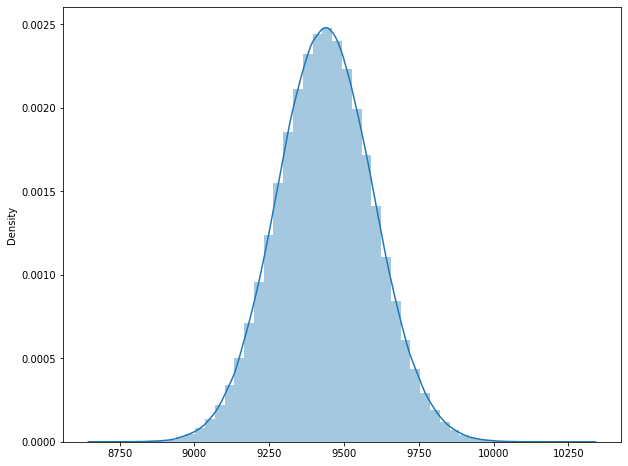

In [151]:
plt.figure(figsize=(10,8))
sns.distplot(bootstrapped_means_males)
plt.show()

In [152]:
print('Mean of bootstrpped samples of size - 1000 males purchases over 10000 times is:',np.mean(bootstrapped_means_males))
print('Mean of given sample males purchases of size - 441259 is :',np.mean(df_males['Purchase']))

Mean of bootstrpped samples of size - 1000 males purchases over 10000 times is: 9437.709729917004
Mean of given sample males purchases of size - 441259 is : 9437.526040472265


In [153]:
len(bootstrapped_means_males)

1000000

__Purchase behaviour between Male and Female Customers__  
__Business Insights -__

__CI on given sample set of Male and Female customer purchases__  
1. Population(50M) mean of female purchase amount with CI of 90% will lie between 8713.287834648021 and 8755.84369566293
2. Population(50M) mean of male purchase amount with CI of 90% will lie between 9424.512497305488 and 9450.539583639042

__CI on bootstrapped set of 1M Male and 1M Female customer purchases__  
1. Population(50M) mean of female purchase amount with CI of 90% will lie between 8734.664700637024 and 8735.16024150497 for bootstrapped female samples(1M)
2. Population(50M) mean of male purchase amount with CI of 90% will lie between 9437.445125699107 and 9437.9743341349 for bootstrapped male samples(1M)

__Average Female customer purchase with confidence interval of 90% is 8734 vs Average Male customer purchase with confidence interval of 90% is 9437__

In [161]:
#Function to calculate confidence interval(range)
def Calculate_CI(sample_mean,sample_std,n,confidence):
    ub=sample_mean-(norm.ppf((1-confidence/100)/2)*(sample_std/np.sqrt(n)))
    lb=sample_mean+(norm.ppf((1-confidence/100)/2)*(sample_std/np.sqrt(n)))
    return lb,ub   

In [166]:
#Lets calculate range of female population mean with 90% confidence interval 
# 90% confidence that Female population mean will lie between 8713.28 and 8755.84

sample_mean=df_females.describe()['Purchase']['mean']
sample_std=df_females.describe()['Purchase']['std']
n=df_females.describe()['Purchase']['count']
confidence=90
lower,upper=Calculate_CI(sample_mean,sample_std,n,confidence)
print('Population(50M) mean of female purchase amount with CI of {}% will lie between {} and {}'.format(confidence,lower,upper))

Population(50M) mean of female purchase amount with CI of 90% will lie between 8713.287834648021 and 8755.84369566293


In [167]:
#Lets calculate range of Male population mean with 90% confidence interval 
# 90% confidence that Male population mean will lie between 9424.5 and 9450.53

sample_mean=df_males.describe()['Purchase']['mean']
sample_std=df_males.describe()['Purchase']['std']
n=df_males.describe()['Purchase']['count']
confidence=90
lower,upper=Calculate_CI(sample_mean,sample_std,n,confidence)
print('Population(50M) mean of male purchase amount with CI of {}% will lie between {} and {}'.format(confidence,lower,upper))

Population(50M) mean of male purchase amount with CI of 90% will lie between 9424.512497305488 and 9450.539583639042


In [169]:
#Lets calculate range of female population mean with 90% confidence interval on bootstrpped samples size of 1M
# 90% confidence that Female population mean will lie between 8734.6 and 8735.2 

sample_mean=np.mean(bootstrapped_means_females)
sample_std=np.std(bootstrapped_means_females)
n=len(bootstrapped_means_females)
confidence=90
lower,upper=Calculate_CI(sample_mean,sample_std,n,confidence)
print('Population(50M) mean of female purchase amount with CI of {}% will lie between {} and {} for bootstrapped female samples(1M)'.format(confidence,lower,upper))

Population(50M) mean of female purchase amount with CI of 90% will lie between 8734.664700637024 and 8735.16024150497 for bootstrapped female samples(1M)


In [176]:
#Lets calculate range of Male population mean with 90% confidence interval 
# 90% confidence that Male population mean will lie between 9437.4 and 9437.9 on bootstrpped samples size of 1M

sample_mean=np.mean(bootstrapped_means_males)
sample_std=np.std(bootstrapped_means_males)
n=len(bootstrapped_means_males)
confidence=90
lower,upper=Calculate_CI(sample_mean,sample_std,n,confidence)
print('Population(50M) mean of male purchase amount with CI of {}% will lie between {} and {} for bootstrapped male samples(1M)'.format(confidence,lower,upper))

Population(50M) mean of male purchase amount with CI of 90% will lie between 9437.445125699107 and 9437.9743341349 for bootstrapped male samples(1M)


__Population mean against bootstrapped sample size of 1M -__  
1. Population(50M) mean of female purchase amount with CI of 90% will lie between 8734.403074295344 and 8734.559934600838 for bootstrapped female samples(1M)

2. Population(50M) mean of female purchase amount with CI of 90% will lie between 9437.505847756458 and 9437.673335379559 for bootstrapped female samples(1M)

In [177]:
#1000 random samples of females purchases taken for 10M times
bootstrapped_means_females_10M=[]
n=1000
for reps in range(10000000):
    bootstrapped_samples_females = np.random.choice(df_females['Purchase'], size=n)
    bootstrapped_mean = np.mean(bootstrapped_samples_females)
    bootstrapped_means_females_10M.append(bootstrapped_mean)

In [178]:
bootstrapped_means_males_10M=[]
n=1000
for reps in range(10000000):
    bootstrapped_samples_males = np.random.choice(df_males['Purchase'], size=n)
    bootstrapped_mean = np.mean(bootstrapped_samples_males)
    bootstrapped_means_males_10M.append(bootstrapped_mean)

In [179]:
 #Lets calculate range of female population mean with 90% confidence interval on bootstrpped samples size of 1M
# 90% confidence that Female population mean will lie between  8734.4 and 8734.6

sample_mean=np.mean(bootstrapped_means_females_10M)
sample_std=np.std(bootstrapped_means_females_10M)
n=len(bootstrapped_means_females_10M)
confidence=90
lower,upper=Calculate_CI(sample_mean,sample_std,n,confidence)
print('Population(50M) mean of female purchase amount with CI of {}% will lie between {} and {} for bootstrapped female samples(1M)'.format(confidence,lower,upper))

Population(50M) mean of female purchase amount with CI of 90% will lie between 8734.403074295344 and 8734.559934600838 for bootstrapped female samples(1M)


In [180]:
 #Lets calculate range of male population mean with 90% confidence interval on bootstrpped samples size of 1M
# 90% confidence that Male population mean will lie between 9437.5 and 9437.7

sample_mean=np.mean(bootstrapped_means_males_10M)
sample_std=np.std(bootstrapped_means_males_10M)
n=len(bootstrapped_means_males_10M)
confidence=90
lower,upper=Calculate_CI(sample_mean,sample_std,n,confidence)
print('Population(50M) mean of female purchase amount with CI of {}% will lie between {} and {} for bootstrapped female samples(1M)'.format(confidence,lower,upper))

Population(50M) mean of female purchase amount with CI of 90% will lie between 9437.505847756458 and 9437.673335379559 for bootstrapped female samples(1M)


In [181]:
#Create new df for single and partnered customers
df_single=df[df['Marital_Status']==0]
df_partnered=df[df['Marital_Status']==1]

In [182]:
df_single.shape

(324731, 10)

In [183]:
df_partnered.shape

(225337, 10)

In [184]:
df_single.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,3.247310e+05,324731.000000,324731.0,324731.000000,324731.000000
mean,1.002999e+06,7.944782,0.0,5.339059,9265.907619
std,1.700466e+03,6.402753,0.0,3.912070,5027.347859
min,1.000001e+06,0.000000,0.0,1.000000,12.000000
25%,1.001524e+06,3.000000,0.0,1.000000,5605.000000
50%,1.003065e+06,7.000000,0.0,5.000000,8044.000000
75%,1.004386e+06,14.000000,0.0,8.000000,12061.000000
max,1.006040e+06,20.000000,0.0,20.000000,23961.000000


In [185]:
df_partnered.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,2.253370e+05,225337.000000,225337.0,225337.000000,225337.000000
mean,1.003071e+06,8.266823,1.0,5.498245,9261.174574
std,1.765091e+03,6.687118,0.0,3.968868,5016.897378
min,1.000004e+06,0.000000,1.0,1.000000,12.000000
25%,1.001506e+06,2.000000,1.0,2.000000,5843.000000
50%,1.003093e+06,7.000000,1.0,5.000000,8051.000000
75%,1.004647e+06,14.000000,1.0,8.000000,12042.000000
max,1.006039e+06,20.000000,1.0,20.000000,23961.000000


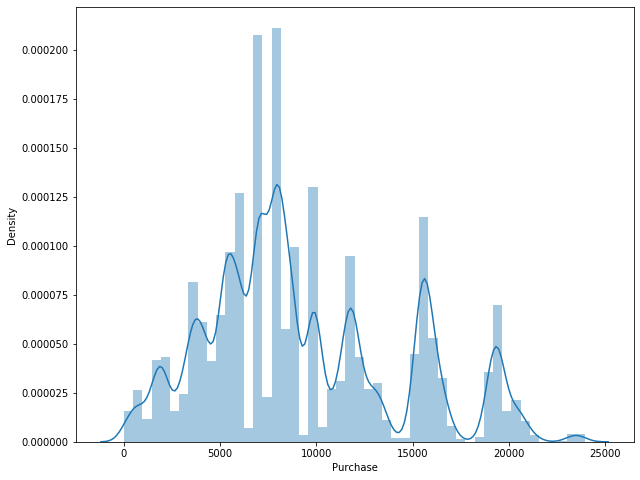

In [186]:
#lets explore Single customers
plt.figure(figsize=(10,8))
sns.distplot(df_single['Purchase'])
plt.show()

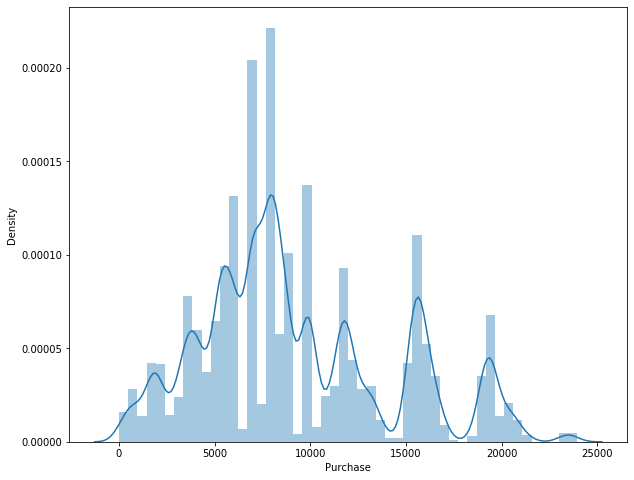

In [187]:
#lets explore partnered customers
plt.figure(figsize=(10,8))
sns.distplot(df_partnered['Purchase'])
plt.show()

__Purchase behaviour between Single and Partnered Customers__  
__Business Insights-__  
1. Population mean of single customers purchase amount with CI of 90% will lie between 9251.39638582367 and 9280.418852019344

2. Population mean of partnered customers purchase amount with CI of 90% will lie between 9243.790713903045 and 9278.558434261702

__Confidence interval of 90% for single and partnered customers overlap__  

1. Population mean of single customers purchase amount with CI of 99% will lie between 9243.183129136169 and 9288.632108706845
2. Population mean of partnered customers purchase amount with CI of 99% will lie between 9233.951570329937 and 9288.39757783481

__Confidence interval of 99% for single and partnered customers overlap__ 

In [192]:
#Lets explore population mean with 90% confidence interval for single and partnered customers
#Single customers
sample_mean=df_single.describe()['Purchase']['mean']
sample_std=df_single.describe()['Purchase']['std']
n=df_single.describe()['Purchase']['count']
confidence=90
lower,upper=Calculate_CI(sample_mean,sample_std,n,confidence)
print('Sample Size(Single customers): ',n,'\tSample Mean(Single customers): ',sample_mean)
print('Population mean of single customers purchase amount with CI of {}% will lie between {} and {}'.format(confidence,lower,upper))

print('\n')
#Partenerd customers

sample_mean=df_partnered.describe()['Purchase']['mean']
sample_std=df_partnered.describe()['Purchase']['std']
n=df_partnered.describe()['Purchase']['count']
confidence=90
lower,upper=Calculate_CI(sample_mean,sample_std,n,confidence)
print('Sample Size(Partnered customers): ',n,'\tSample Mean(Partnered customers): ',sample_mean)
print('Population mean of partnered customers purchase amount with CI of {}% will lie between {} and {}'.format(confidence,lower,upper))

Sample Size(Single customers):  324731.0 	Sample Mean(Single customers):  9265.907618921507
Population mean of single customers purchase amount with CI of 90% will lie between 9251.39638582367 and 9280.418852019344


Sample Size(Partnered customers):  225337.0 	Sample Mean(Partnered customers):  9261.174574082374
Population mean of partnered customers purchase amount with CI of 90% will lie between 9243.790713903045 and 9278.558434261702


In [200]:
#Lets explore population mean with 95% confidence interval for single and partnered customers
#Single customers
sample_mean=df_single.describe()['Purchase']['mean']
sample_std=df_single.describe()['Purchase']['std']
n=df_single.describe()['Purchase']['count']
confidence=99
lower,upper=Calculate_CI(sample_mean,sample_std,n,confidence)
print('Sample Size(Single customers): ',n,'\tSample Mean(Single customers): ',sample_mean)
print('Population mean of single customers purchase amount with CI of {}% will lie between {} and {}'.format(confidence,lower,upper))

print('\n')
#Partenerd customers

sample_mean=df_partnered.describe()['Purchase']['mean']
sample_std=df_partnered.describe()['Purchase']['std']
n=df_partnered.describe()['Purchase']['count']
confidence=99
lower,upper=Calculate_CI(sample_mean,sample_std,n,confidence)
print('Sample Size(Partnered customers): ',n,'\tSample Mean(Partnered customers): ',sample_mean)
print('Population mean of partnered customers purchase amount with CI of {}% will lie between {} and {}'.format(confidence,lower,upper))

Sample Size(Single customers):  324731.0 	Sample Mean(Single customers):  9265.907618921507
Population mean of single customers purchase amount with CI of 99% will lie between 9243.183129136169 and 9288.632108706845


Sample Size(Partnered customers):  225337.0 	Sample Mean(Partnered customers):  9261.174574082374
Population mean of partnered customers purchase amount with CI of 99% will lie between 9233.951570329937 and 9288.39757783481


Mean of bootstrapped samples of single customers 9269.080553 of size 1000
Mean of bootstrapped samples of partnered customers 9262.346156 of size 1000


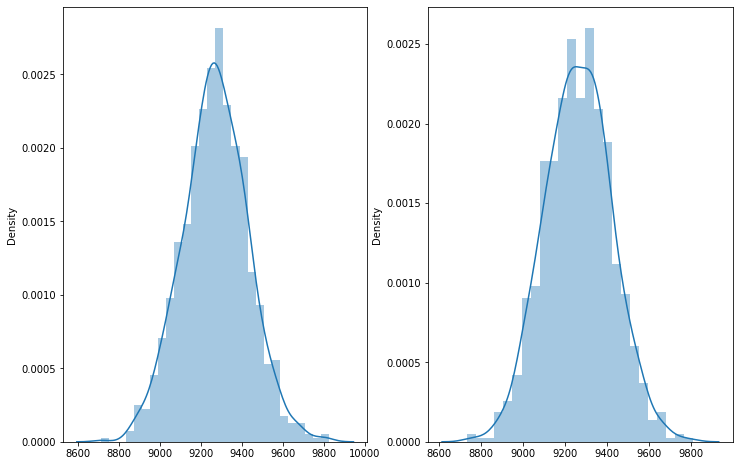

In [198]:
#1000 random samples of females purchases taken for 1000 times
bootstrapped_means_single=[]
bootstrapped_means_partnered=[]
n=1000
for reps in range(1000):
    bootstrapped_samples_single = np.random.choice(df_single['Purchase'], size=n)
    bootstrapped_samples_partnered = np.random.choice(df_partnered['Purchase'], size=n)
    bootstrapped_mean_s = np.mean(bootstrapped_samples_single)
    bootstrapped_mean_p = np.mean(bootstrapped_samples_partnered)
    bootstrapped_means_single.append(bootstrapped_mean_s)
    bootstrapped_means_partnered.append(bootstrapped_mean_p)
print('Mean of bootstrapped samples of single customers {} of size {}'.format(np.mean(bootstrapped_means_single),n))
print('Mean of bootstrapped samples of partnered customers {} of size {}'.format(np.mean(bootstrapped_means_partnered),n))
#graph
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.distplot(bootstrapped_means_single)
plt.subplot(1,2,2)
sns.distplot(bootstrapped_means_partnered)
plt.show()

In [207]:
df.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

__Purchase behaviour between different age groups customers__  

__Business Insights-__  

1. Population mean of age group 0_17 customers purchase amount with CI of 90% will lie between 8865.053694527898 and 9001.87558636205  

2. Population mean of age group 18_25 customers purchase amount with CI of 90% will lie between 9143.433031607847 and 9195.89418091473  

3. Population mean of age group 26_35 customers purchase amount with CI of 90% will lie between 9235.103000581124 and 9270.278265158651  

4. Population mean of age group 36_50 customers purchase amount with CI of 90% will lie between 9170.406859081897 and 9246.844535854758  

5. Population mean of age group 51_55 customers purchase amount with CI of 90% will lie between 9492.161430973249 and 9577.454630947223  

6. Population mean of age group above 55 customers purchase amount with CI of 90% will lie between 9280.067707714425 and 9392.493211184385  

__1. Customers with age group 51_55 has highest purchase power between 9492 and 9577 with 90% CI.__  
__2. Customers with age group 0-17 has lowest purchase power between 8865 and 9001__    
__3. Customers with age group 26_35 and 26_50 have overlap so walmart should treat these customers same__  



In [208]:
#Create new df for single and partnered customers
df_age_0_17=df[df['Age']=='0-17']
df_age_18_25=df[df['Age']=='18-25']
df_age_26_35=df[df['Age']=='26-35']
df_age_36_50=df[df['Age']=='36-50']
df_age_51_55=df[df['Age']=='51-55']
df_age_55_above=df[df['Age']=='55+']

In [210]:
#Lets explore population mean with 90% confidence interval for customers with different age groups
# Customers with age between 0 and 17
sample_mean=df_age_0_17.describe()['Purchase']['mean']
sample_std=df_age_0_17.describe()['Purchase']['std']
n=df_age_0_17.describe()['Purchase']['count']
confidence=90
lower,upper=Calculate_CI(sample_mean,sample_std,n,confidence)
print('Sample Size(age group 0_17): ',n,'\tSample Mean(age group 0_17): ',sample_mean)
print('Population mean of age group 0_17 customers purchase amount with CI of {}% will lie between {} and {}'.format(confidence,lower,upper))

# Customers with age between 18 and 25

sample_mean=df_age_18_25.describe()['Purchase']['mean']
sample_std=df_age_18_25.describe()['Purchase']['std']
n=df_age_18_25.describe()['Purchase']['count']
confidence=90
lower,upper=Calculate_CI(sample_mean,sample_std,n,confidence)
print('Sample Size(age group 18_25): ',n,'\tSample Mean(age group 18_25): ',sample_mean)
print('Population mean of age group 18_25 customers purchase amount with CI of {}% will lie between {} and {}'.format(confidence,lower,upper))

# Customers with age between 26 and 35

sample_mean=df_age_26_35.describe()['Purchase']['mean']
sample_std=df_age_26_35.describe()['Purchase']['std']
n=df_age_26_35.describe()['Purchase']['count']
confidence=90
lower,upper=Calculate_CI(sample_mean,sample_std,n,confidence)
print('Sample Size(Page group 26_35): ',n,'\tSample Mean(age group 26_35): ',sample_mean)
print('Population mean of age group 26_35 customers purchase amount with CI of {}% will lie between {} and {}'.format(confidence,lower,upper))

# Customers with age between 36 and 50

sample_mean=df_age_36_50.describe()['Purchase']['mean']
sample_std=df_age_36_50.describe()['Purchase']['std']
n=df_age_36_50.describe()['Purchase']['count']
confidence=90
lower,upper=Calculate_CI(sample_mean,sample_std,n,confidence)
print('Sample Size(age group 36_50): ',n,'\tSample Mean(age group 36_50): ',sample_mean)
print('Population mean of age group 36_50 customers purchase amount with CI of {}% will lie between {} and {}'.format(confidence,lower,upper))

# Customers with age between 51 and 55

sample_mean=df_age_51_55.describe()['Purchase']['mean']
sample_std=df_age_51_55.describe()['Purchase']['std']
n=df_age_51_55.describe()['Purchase']['count']
confidence=90
lower,upper=Calculate_CI(sample_mean,sample_std,n,confidence)
print('Sample Size(age group 51_55): ',n,'\tSample Mean(age group 51_55): ',sample_mean)
print('Population mean of age group 51_55 customers purchase amount with CI of {}% will lie between {} and {}'.format(confidence,lower,upper))

# Customers with age above 55

sample_mean=df_age_55_above.describe()['Purchase']['mean']
sample_std=df_age_55_above.describe()['Purchase']['std']
n=df_age_55_above.describe()['Purchase']['count']
confidence=90
lower,upper=Calculate_CI(sample_mean,sample_std,n,confidence)
print('Sample Size(age group above 55): ',n,'\tSample Mean(age group above 55): ',sample_mean)
print('Population mean of age group above 55 customers purchase amount with CI of {}% will lie between {} and {}'.format(confidence,lower,upper))

Sample Size(age group 0_17):  15102.0 	Sample Mean(age group 0_17):  8933.464640444974
Population mean of age group 0_17 customers purchase amount with CI of 90% will lie between 8865.053694527898 and 9001.87558636205
Sample Size(age group 18_25):  99660.0 	Sample Mean(age group 18_25):  9169.663606261289
Population mean of age group 18_25 customers purchase amount with CI of 90% will lie between 9143.433031607847 and 9195.89418091473
Sample Size(Page group 26_35):  219587.0 	Sample Mean(age group 26_35):  9252.690632869888
Population mean of age group 26_35 customers purchase amount with CI of 90% will lie between 9235.103000581124 and 9270.278265158651
Sample Size(age group 36_50):  45701.0 	Sample Mean(age group 36_50):  9208.625697468327
Population mean of age group 36_50 customers purchase amount with CI of 90% will lie between 9170.406859081897 and 9246.844535854758
Sample Size(age group 51_55):  38501.0 	Sample Mean(age group 51_55):  9534.808030960236
Population mean of age gro

Mean of bootstrapped samples of age_0_17 customers 8934.69054 of size 1000
Mean of bootstrapped samples of age_18_25 customers 9171.78507 of size 1000
Mean of bootstrapped samples of age_26_35 customers 9258.428719999998 of size 1000
Mean of bootstrapped samples of age_36_50 customers 9202.753120000001 of size 1000
Mean of bootstrapped samples of age_51_55 customers 9526.941276999998 of size 1000
Mean of bootstrapped samples of age_55_above customers 9337.969701 of size 1000


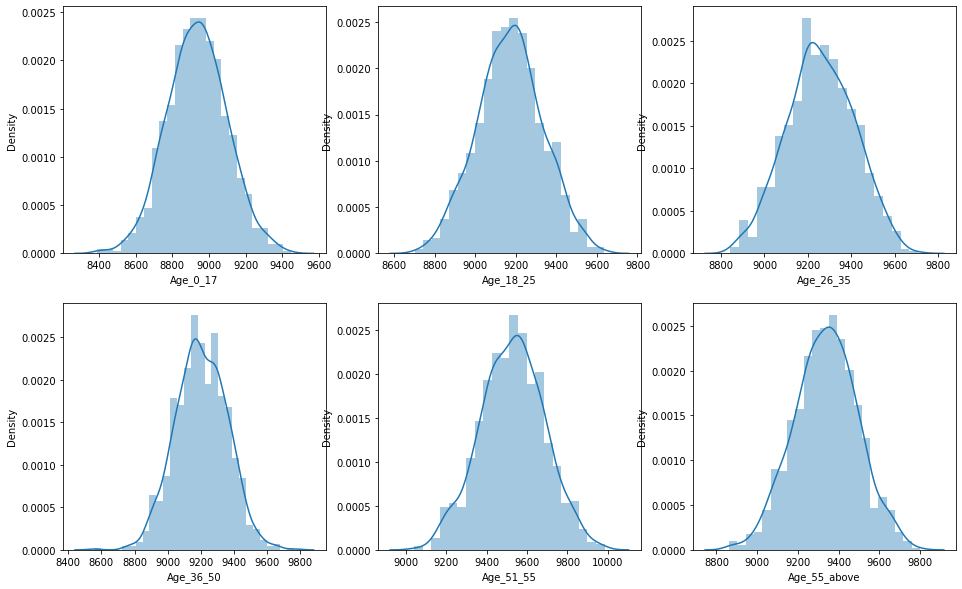

In [234]:
#1000 random samples of Age group wise purchases taken for 1000 times
bootstrapped_means_age_0_17=[]
bootstrapped_means_age_18_25=[]
bootstrapped_means_age_26_35=[]
bootstrapped_means_age_36_50=[]
bootstrapped_means_age_51_55=[]
bootstrapped_means_age_55_above=[]
n=1000
for reps in range(1000):
    bootstrapped_samples_age_0_17 = np.random.choice(df_age_0_17['Purchase'], size=n)
    bootstrapped_samples_age_18_25 = np.random.choice(df_age_18_25['Purchase'], size=n)
    bootstrapped_samples_age_26_35 = np.random.choice(df_age_26_35['Purchase'], size=n)
    bootstrapped_samples_age_36_50 = np.random.choice(df_age_36_50['Purchase'], size=n)
    bootstrapped_samples_age_51_55 = np.random.choice(df_age_51_55['Purchase'], size=n)
    bootstrapped_samples_age_55_above = np.random.choice(df_age_55_above['Purchase'], size=n)
    bootstrapped_mean_17 = np.mean(bootstrapped_samples_age_0_17)
    bootstrapped_mean_25 = np.mean(bootstrapped_samples_age_18_25)
    bootstrapped_mean_35 = np.mean(bootstrapped_samples_age_26_35)
    bootstrapped_mean_50 = np.mean(bootstrapped_samples_age_36_50)
    bootstrapped_mean_55 = np.mean(bootstrapped_samples_age_51_55)
    bootstrapped_mean_56 = np.mean(bootstrapped_samples_age_55_above)
    bootstrapped_means_age_0_17.append(bootstrapped_mean_17)
    bootstrapped_means_age_18_25.append(bootstrapped_mean_25)
    bootstrapped_means_age_26_35.append(bootstrapped_mean_35)
    bootstrapped_means_age_36_50.append(bootstrapped_mean_50)
    bootstrapped_means_age_51_55.append(bootstrapped_mean_55)
    bootstrapped_means_age_55_above.append(bootstrapped_mean_56)
print('Mean of bootstrapped samples of age_0_17 customers {} of size {}'.format(np.mean(bootstrapped_means_age_0_17),n))
print('Mean of bootstrapped samples of age_18_25 customers {} of size {}'.format(np.mean(bootstrapped_means_age_18_25),n))
print('Mean of bootstrapped samples of age_26_35 customers {} of size {}'.format(np.mean(bootstrapped_means_age_26_35),n))
print('Mean of bootstrapped samples of age_36_50 customers {} of size {}'.format(np.mean(bootstrapped_means_age_36_50),n))
print('Mean of bootstrapped samples of age_51_55 customers {} of size {}'.format(np.mean(bootstrapped_means_age_51_55),n))
print('Mean of bootstrapped samples of age_55_above customers {} of size {}'.format(np.mean(bootstrapped_means_age_55_above),n))
#graph
plt.figure(figsize=(16,10))
plt.subplot(2,3,1)
sns.distplot(bootstrapped_means_age_0_17)
plt.xlabel('Age_0_17')
plt.subplot(2,3,2)
sns.distplot(bootstrapped_means_age_18_25)
plt.xlabel('Age_18_25')
plt.subplot(2,3,3)
sns.distplot(bootstrapped_means_age_26_35)
plt.xlabel('Age_26_35')
plt.subplot(2,3,4)
sns.distplot(bootstrapped_means_age_36_50)
plt.xlabel('Age_36_50')
plt.subplot(2,3,5)
sns.distplot(bootstrapped_means_age_51_55)
plt.xlabel('Age_51_55')
plt.subplot(2,3,6)
sns.distplot(bootstrapped_means_age_55_above)
plt.xlabel('Age_55_above')
plt.show()

__Data Insights -__  

1. Shape - (550068, 10)
2. Missing Values -  None
3. Gender - Male(M) and Female(F)
4. Age -  ['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
5. Marital Status - [0, 1],
6. City Group - ['A', 'C', 'B']

__Business Insights -__  

1. Purchase amount above 21400 are outlier purchases, there are total 2677 such purchases.
2. Average purchase amount by Male customers (9437.526) is higher than Female customers(8734.566) for sample dataset.
3. Single customers(marital status-0) orders are higher than married customers(marital status-1).
4. Occupation of customers has no relation with purchase amount.
5. Product category- 1,5,8 are most popular product category on Walmart and has highest purchase amounts or revenue.
6. City category B has customers with highest spending on Walmart than other 2 categories - A and C.
7. Customers recently moved to new city (about a year) are more likely to purchase from Walmart than customers staying in same city for more than 1 year.
8. Average males purchase amount for given sample is greater than Average females purchase amount by approx. 703$.  
   a. Males purchases sample size(441259) as average - 9437.52 Vs Females purchases sample size(135809) as average - 8734.56  
   b.1M Bootstrapped samples of Male purchase amount - 9437.24 Vs 1M Bootstrapped samples of Female purchase amount - 8734.9
9. Purchase behavior between Male and Female Customers, 90% CI on customer purchase between male and female does not overlap.

90% CI on given sample set of Male and Female customer purchases

Population(50M) mean of female purchase amount with CI of 90% will lie between 8713.287834648021 and 8755.84369566293
Population(50M) mean of male purchase amount with CI of 90% will lie between 9424.512497305488 and 9450.539583639042

90% CI on bootstrapped set of 1M Male and 1M Female customer purchases

Population(50M) mean of female purchase amount with CI of 90% will lie between 8734.664700637024 and 8735.16024150497 for bootstrapped female samples(1M)
Population(50M) mean of male purchase amount with CI of 90% will lie between 9437.445125699107 and 9437.9743341349 for bootstrapped male samples(1M)
Average Female customer purchase with confidence interval of 90% is 8734 vs Average Male customer purchase with confidence interval of 90% is 9437

10. Purchase behavior between Single and Partnered Customers, 90% and 99% CI on customer purchase between single and partnered customers  does overlap.

90% CI for single and partnered customers overlap

Population mean of single customers purchase amount with CI of 90% will lie between 9251.39638582367 and 9280.418852019344
Population mean of partnered customers purchase amount with CI of 90% will lie between 9243.790713903045 and 9278.558434261702

Confidence interval of 99% for single and partnered customers overlap

Population mean of single customers purchase amount with CI of 99% will lie between 9243.183129136169 and 9288.632108706845
Population mean of partnered customers purchase amount with CI of 99% will lie between 9233.951570329937 and 9288.39757783481

11.Purchase behavior between different age groups customers 
Population mean of age group 0_17 customers purchase amount with CI of 90% will lie between 8865.053694527898 and 9001.87558636205

Population mean of age group 18_25 customers purchase amount with CI of 90% will lie between 9143.433031607847 and 9195.89418091473

Population mean of age group 26_35 customers purchase amount with CI of 90% will lie between 9235.103000581124 and 9270.278265158651

Population mean of age group 36_50 customers purchase amount with CI of 90% will lie between 9170.406859081897 and 9246.844535854758

Population mean of age group 51_55 customers purchase amount with CI of 90% will lie between 9492.161430973249 and 9577.454630947223

Population mean of age group above 55 customers purchase amount with CI of 90% will lie between 9280.067707714425 and 9392.493211184385

1. Customers with age group 51_55 has highest purchase power between 9492 and 9577 with 90% CI.
2. Customers with age group 0-17 has lowest purchase power between 8865 and 9001
3. Customers with age group 26_35 and 26_50 have overlap so Walmart should treat these customers same

__Recommendations -__  

1. Male customers generate on an average more revenue to Walmart than Female customers, so Walmart should contract or produce more female centric products, segments to encourage female customers to buy more from Walmart. 
2. Purchase behavior between Male and Female customers with highest confidence interval does not overlap, so there is clear distinction between female customers purchase power vs Male customers purchase power, hence Walmart should run different promotions, events targeting both groups separately.
3. Single and Partnered customers have overlap with highest confidence interval, so these 2 segment of customers can not be distinguished and Walmart should focus both set of customers.
4. Age group (51-55) have highest amount of purchases while age group (26_35 and 36_50) have overlap of highest confidence interval, so Walmart needs focus on age group 26_50 to encourage more purchase by launching more products to attract this age group.  
5. Walmart should implement new strategy to onboard products with reasonable discounts, promotions, appearance to attract single and partnered customers along with different age groups based on their presence in category of city. 